<H1> Default Credit  Modelling

In [1]:
import pandas as pd
df = pd.read_excel (r'C:\Users\erijg\Desktop\Arij_pfe\bilans.xlsx')
df = df.drop(columns=['Secteur', 'Exercice'])
df.head()

,Forme_juridique,Ancienneté,R1,R2,R3,R4,R5,R6,R7,X1,X2,X3,X4,X5,Z,statut
0,SA,40_et_plus,0.17340,-0.38609,0.76827,0.27304,3.68016,0.56702,-0.47156,-0.20567,0.08171,0.04655,0.13409,0.18036,0.282019,mauvaise
1,SA,40_et_plus,0.10875,-0.39510,0.74589,0.27501,3.81500,0.57152,-0.65574,-0.21816,0.07968,0.11488,0.07485,0.20635,0.480124,mauvaise
2,SA,40_et_plus,0.08374,-0.38199,0.74030,0.26492,0.84655,0.53222,-0.31676,-0.21874,0.07823,-2778.90734,0.05509,0.25984,-9170.254294,mauvaise
3,COOPERATIVE,sup_20_inf_40,0.05009,-0.53088,1.18941,0.18368,0.69905,1.07108,-0.83437,0.05163,0.07730,0.12903,0.01651,0.45979,1.065671,mauvaise
4,COOPERATIVE,40_et_plus,0.13358,-0.26006,0.69516,0.27622,0.71560,0.46454,-0.55552,-0.19921,0.58237,0.09585,0.06460,0.40173,1.333061,mauvaise


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Forme_juridique  1050 non-null   object 
 1   Ancienneté       1050 non-null   object 
 2   R1               1050 non-null   float64
 3   R2               1048 non-null   float64
 4   R3               1011 non-null   float64
 5   R4               1049 non-null   float64
 6   R5               1046 non-null   float64
 7   R6               1049 non-null   float64
 8   R7               1050 non-null   float64
 9   X1               1050 non-null   float64
 10  X2               1050 non-null   float64
 11  X3               1050 non-null   float64
 12  X4               1050 non-null   float64
 13  X5               1050 non-null   float64
 14  Z                1050 non-null   float64
 15  statut           1050 non-null   object 
dtypes: float64(13), object(3)
memory usage: 131.4+ KB


In [3]:
df.describe()

,R1,R2,R3,R4,R5,R6,R7,X1,X2,X3,X4,X5,Z
count,1050.000000,1048.000000,1011.000000,1049.000000,1046.000000,1049.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.571252,0.161211,18.020314,0.099455,1.522282,0.212814,0.222199,0.253429,0.042850,-3.701495,1.106668,1.272444,-9.914383
std,1.384508,1.574142,222.363378,2.317349,3.740257,2.132732,1.871696,0.319750,0.125847,89.776098,5.635873,1.398854,296.342477
min,-7.280610,-2.568540,-5.302770,-60.322870,0.000000,-39.000000,-22.678570,-1.335230,0.000000,-2778.907340,-0.715710,-0.003440,-9170.254294
25%,0.341363,-0.192018,1.166395,0.014790,0.196132,0.102530,0.040348,0.084500,0.000000,0.051095,0.168783,0.603285,1.391406
50%,0.585715,0.011315,2.053720,0.056090,0.427345,0.232660,0.158410,0.279240,0.003245,0.148775,0.394540,0.979705,2.279444
75%,0.789605,0.186458,4.399105,0.154790,1.141575,0.409670,0.347220,0.453307,0.016230,0.275730,0.846360,1.494970,3.332218
max,39.787050,32.046220,6893.644750,26.573160,40.416670,2.533150,45.028580,0.971170,1.015390,5.873130,126.628770,20.437300,76.315459


<H1>Data Preparation</H1>

<h2>1. Data Cleaning</h2>


1.1 Count of null observations in the dataset

In [4]:
df.isnull().sum().sum()

47

1.2 Percentage of null variables 

<AxesSubplot:>

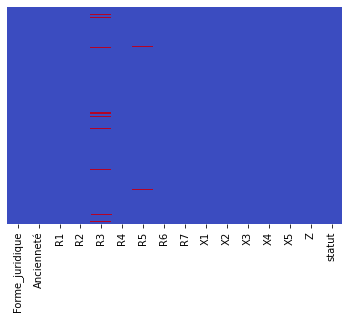

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,
            yticklabels=False,cmap = 'coolwarm')

In [6]:
((df.isnull().sum()/df.shape[0])*100).round(4)

Forme_juridique    0.0000
Ancienneté         0.0000
R1                 0.0000
R2                 0.1905
R3                 3.7143
R4                 0.0952
R5                 0.3810
R6                 0.0952
R7                 0.0000
X1                 0.0000
X2                 0.0000
X3                 0.0000
X4                 0.0000
X5                 0.0000
Z                  0.0000
statut             0.0000
dtype: float64

In [7]:
# drop missing values
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Forme_juridique    0
Ancienneté         0
R1                 0
R2                 0
R3                 0
R4                 0
R5                 0
R6                 0
R7                 0
X1                 0
X2                 0
X3                 0
X4                 0
X5                 0
Z                  0
statut             0
dtype: int64

In [8]:
df.shape

(1005, 16)

In [9]:
df.head()

,Forme_juridique,Ancienneté,R1,R2,R3,R4,R5,R6,R7,X1,X2,X3,X4,X5,Z,statut
0,SA,40_et_plus,0.17340,-0.38609,0.76827,0.27304,3.68016,0.56702,-0.47156,-0.20567,0.08171,0.04655,0.13409,0.18036,0.282019,mauvaise
1,SA,40_et_plus,0.10875,-0.39510,0.74589,0.27501,3.81500,0.57152,-0.65574,-0.21816,0.07968,0.11488,0.07485,0.20635,0.480124,mauvaise
2,SA,40_et_plus,0.08374,-0.38199,0.74030,0.26492,0.84655,0.53222,-0.31676,-0.21874,0.07823,-2778.90734,0.05509,0.25984,-9170.254294,mauvaise
3,COOPERATIVE,sup_20_inf_40,0.05009,-0.53088,1.18941,0.18368,0.69905,1.07108,-0.83437,0.05163,0.07730,0.12903,0.01651,0.45979,1.065671,mauvaise
4,COOPERATIVE,40_et_plus,0.13358,-0.26006,0.69516,0.27622,0.71560,0.46454,-0.55552,-0.19921,0.58237,0.09585,0.06460,0.40173,1.333061,mauvaise


1.3 Treating outliers 

In [10]:
import seaborn as sns

from scipy import stats
import matplotlib.pyplot as plt


In [11]:
import pandas as pd
import numpy as np
Q1=df.drop(columns=['Forme_juridique','Ancienneté','statut']).quantile(0.25)
Q3=df.drop(columns=['Forme_juridique','Ancienneté','statut']).quantile(0.75)
IQR=Q3-Q1
# calculate the outlier cutoff
cut_off = IQR * 1.5
lower,upper = Q1- cut_off, Q3 + cut_off
#print(df.drop(columns=['Forme_juridique','Secteur','Ancienneté','statut']).columns)
pd.DataFrame(zip(np.transpose(df.drop(columns=['Forme_juridique','Ancienneté',
'statut']).columns),np.transpose(lower).round(4), np.transpose(upper).round(4)), columns=['variable','lower_limit', 'upper_limit'])

,variable,lower_limit,upper_limit
0,R1,-0.3265,1.4472
1,R2,-0.7382,0.7300
2,R3,-3.6807,9.2546
3,R4,-0.1996,0.3769
4,R5,-1.2105,2.5573
5,R6,-0.3558,0.8724
6,R7,-0.4077,0.7839
7,X1,-0.4616,0.9809
8,X2,-0.0249,0.0415
9,X3,-0.2733,0.5984


In [12]:
((df.drop(columns=['Forme_juridique','Ancienneté','statut']) < lower) |
 (df.drop(columns=['Forme_juridique','Ancienneté','statut']) > upper)).sum()

R1     51
R2     90
R3    144
R4    123
R5    125
R6     63
R7    123
X1     25
X2    141
X3    109
X4    109
X5     62
Z      89
dtype: int64

In [13]:
df = df[~((df < lower) |(df > upper)).any(axis=1)]
((df.drop(columns=['Forme_juridique','Ancienneté','statut']) < lower) |
 (df.drop(columns=['Forme_juridique','Ancienneté','statut']) > upper)).sum()

R1    0
R2    0
R3    0
R4    0
R5    0
R6    0
R7    0
X1    0
X2    0
X3    0
X4    0
X5    0
Z     0
dtype: int64

<h2> 2. Creating dummy variables </h2>

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()


In [15]:
df['Forme_juridique'] = df['Forme_juridique'].map({'SA': 0, 'SARL': 1, 'SUARL': 2, 'PERSONNE_PHYSIQUE':3, 'COOPERATIVE':4,
                                                  'ETAB_PUB_NON_ADMIN':5})
df['Forme_juridique'].unique()

array([1, 0, 3, 5, 2, 4], dtype=int64)

In [16]:
df['Ancienneté'] = df['Ancienneté'].map({'40_et_plus': 0, 'sup_20_inf_40': 1, 'sup_10_inf_20': 2, 'inf_10': 3})
df['Ancienneté'].unique()

array([0, 1, 2, 3], dtype=int64)

In [17]:
df.shape

(313, 16)

In [18]:
df['statut'] = df['statut'].map({'bonne': 1,'mauvaise':2})
df['statut'].unique()

array([1, 2], dtype=int64)

<h1> 3. Feature Selection</h1>

In [19]:
#Rearranging the Columns
dfNew = df.drop(['statut'], axis = 1)
dfNew['statut'] = df['statut']
print(dfNew.shape)
print(dfNew.columns)
df = dfNew

(313, 16)
Index(['Forme_juridique', 'Ancienneté', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6',
       'R7', 'X1', 'X2', 'X3', 'X4', 'X5', 'Z', 'statut'],
      dtype='object')


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import normalize

In [21]:
from sklearn.preprocessing import normalize
X = df.drop(['Z'], axis = 1).iloc[:,0:13]  #independent columns
y = df.iloc[:,-1] 
 
fvalue_Best = SelectKBest(f_classif, k=13)
X_kbest = fvalue_Best.fit_transform(X, y)
print(X_kbest)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)


[[1.      0.      0.77778 ... 0.01271 0.17135 1.24627]
 [1.      0.      0.76554 ... 0.01387 0.19601 1.51616]
 [0.      1.      0.67823 ... 0.02071 0.11688 1.21372]
 ...
 [1.      3.      0.86845 ... 0.00615 0.25373 0.38318]
 [1.      3.      0.66793 ... 0.      0.38548 0.83921]
 [1.      3.      1.      ... 0.      0.40392 1.15228]]
Original number of features: (313, 13)
Reduced number of features: (313, 13)


In [22]:
fit = fvalue_Best.fit(normalize(X, axis=0, norm='l2'),y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))  #print 14 best features


              Specs      Score
11               X3  78.302162
9                X1  53.590638
3                R2  33.224977
4                R3  14.986188
12               X4  13.160683
6                R5   4.967204
8                R7   4.822781
10               X2   4.362997
0   Forme_juridique   3.271453
5                R4   2.267266
2                R1   2.226926
1        Ancienneté   0.486932
7                R6   0.189119


In [23]:
df.shape

(313, 16)

In [24]:
df.head()

,Forme_juridique,Ancienneté,R1,R2,R3,R4,R5,R6,R7,X1,X2,X3,X4,X5,Z,statut
9,1,0,0.77778,-0.22128,1.51669,0.00288,0.06487,0.21819,0.01769,0.24301,0.01271,0.17135,1.24627,0.46820,2.090823,1
10,1,0,0.76554,-0.55612,1.30405,0.01083,0.05216,0.13413,-0.00152,0.18352,0.01387,0.19601,1.51616,0.53135,2.327521,1
15,0,1,0.67823,0.04699,1.75014,0.10678,0.27625,0.45175,-0.04893,0.34649,0.02071,0.11688,1.21372,0.61769,2.176408,1
16,0,1,0.63594,0.10041,1.79789,0.17689,0.35784,0.49587,-0.05488,0.35257,0.02013,0.05109,1.02108,0.46296,1.695471,2
17,0,1,0.67069,0.16601,1.71128,0.14216,0.50070,0.50842,-0.01968,0.31261,0.02054,0.06555,1.01787,0.40674,1.637665,2


[0.03479788 0.03187365 0.048527   0.07027263 0.06810691 0.05985867
 0.05080207 0.05065952 0.0475574  0.09475624 0.04150855 0.15948222
 0.06326241 0.17853485]


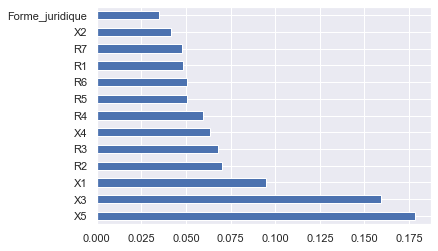

In [25]:
X = df.drop(['statut'], axis = 1).iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [26]:
X = df[['R5', 'R4',
                'R2','R3','X4','X5','X3', 'X1']] #independent columns
y = df.iloc[:,-1]  #labels
print(X.shape)
print(y.shape)
print(X.shape)
print(y.shape)

(313, 8)
(313,)
(313, 8)
(313,)


<H1>4. Classifier Selection By K-Fold Cross Validation</H1>

In this excercise we will shortlist 2 or 3 top classifers on the basis of the precision score obtained from Cross Validation. We choose percision over accuracy here because our data is a bank data where we're try to predict good and bad credits, and the cost associated with wrongly classifying a bad loan as good loan (False Positive) is very big compared to the cost of wrongly classifying a good as bad loan. Therfore a classifier which improves accuracy without sacrificing the precision would be the priority. Also, I use Cross Validation because it's likely to give a consistent and stable estimate of the precision score.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron

<h2>4.1 Decision Tree </h2>

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_score = cross_val_score(dt, X, y, cv=10, scoring='precision')
print(dt_score.mean())

0.9082817280171105


<h2>4.2 Naive Bayes </h2>


In [29]:
nb = GaussianNB()
nb_scores_1 = cross_val_score(nb, X, y, cv=10, scoring='precision')
nb_scores_1.mean()

0.9345811965811966

<h2>4.3 K-Nearest Neighbours (KNN) </h2>


In [30]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn25 = KNeighborsClassifier(n_neighbors=25)
knn51 = KNeighborsClassifier(n_neighbors=51)
knn75 = KNeighborsClassifier(n_neighbors=75)
knn3_score = cross_val_score(knn3, X, y, cv=10, scoring='precision')
knn7_score = cross_val_score(knn7, X, y, cv=10, scoring='precision')
knn15_score = cross_val_score(knn15, X, y, cv=10, scoring='precision')
knn25_score = cross_val_score(knn25, X, y, cv=10, scoring='precision')
knn51_score = cross_val_score(knn51, X, y, cv=10, scoring='precision')
knn75_score = cross_val_score(knn75, X, y, cv=10, scoring='precision')
knn_accuracy_df = pd.DataFrame.from_dict({ 'Neighbours': [3,7,15,25,51,75],
    'Score': [knn3_score.mean(),knn7_score.mean(),knn15_score.mean(),
              knn25_score.mean(),knn51_score.mean(),knn75_score.mean()]})
print(knn_accuracy_df)

   Neighbours     Score
0           3  0.878183
1           7  0.864675
2          15  0.852048
3          25  0.840718
4          51  0.819165
5          75  0.782762


<h2>4.4 Support Vector Machine (SVM) - Linear </h2>

In [31]:
svm_linear = SVC(C=.05, kernel='linear')
svm_scores_1 = cross_val_score(svm_linear, X, y,cv=10, scoring='precision')
svm_scores_1.mean()

0.7827620967741936

<h2>4.5 Support Vector Machine (SVM) - Radial Basis Function (RBF) </h2>

In [32]:
svm_rbf_1 = SVC(C = 0.1, kernel='rbf', gamma=1) 
svm_rbf_scores_1 = cross_val_score(svm_rbf_1, X, y, cv=10, scoring='precision')
print(svm_rbf_scores_1.mean())

0.7827620967741936


<h2>4.6 Perceptron </h2>

In [33]:
perceptron_score = cross_val_score(Perceptron(max_iter=100), X, y, cv=2, scoring='precision')
print(perceptron_score.mean())

0.9247664480222619


<h2>4.7 Random Forest </h2>

In [34]:
n_est_list = [1,2,3,4,5,10,20,40,100]
for n_est in n_est_list:
    random_forest = RandomForestClassifier(n_estimators=n_est)
    scores = cross_val_score(random_forest, X, y, cv=10, scoring='precision')
    print("Random Forest Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Random Forest Accuracy: 0.89 (+/- 0.06) #estimators: 1
Random Forest Accuracy: 0.84 (+/- 0.04) #estimators: 2
Random Forest Accuracy: 0.91 (+/- 0.04) #estimators: 3
Random Forest Accuracy: 0.88 (+/- 0.06) #estimators: 4
Random Forest Accuracy: 0.90 (+/- 0.06) #estimators: 5
Random Forest Accuracy: 0.89 (+/- 0.04) #estimators: 10
Random Forest Accuracy: 0.90 (+/- 0.05) #estimators: 20
Random Forest Accuracy: 0.90 (+/- 0.05) #estimators: 40
Random Forest Accuracy: 0.90 (+/- 0.05) #estimators: 100


<h2>4.8 Logistic Regression </h2>


In [35]:
logreg_score = cross_val_score(LogisticRegression(solver='lbfgs', max_iter = 500), X, y, cv=10, scoring='precision')
print(logreg_score.mean())

0.9077754761203037


<h2>4.9 Extra Trees  </h2>


In [36]:
et_score = cross_val_score(ExtraTreesClassifier(100), X, y, cv=10, scoring='precision')
et_score.mean()

0.9057671396292086

<h2>4.10 Boosting </h2>


In [37]:
dt = DecisionTreeClassifier(max_depth=6)
n_est_list = [1,2,3,4,5,10,15,40,100]
for n_est in n_est_list:
    boosting = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=n_est)
    scores = cross_val_score(boosting, X, y, cv=10, scoring='precision')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Boosting Accuracy: 0.90 (+/- 0.05) #estimators: 1
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 2
Boosting Accuracy: 0.91 (+/- 0.05) #estimators: 3
Boosting Accuracy: 0.90 (+/- 0.05) #estimators: 4
Boosting Accuracy: 0.90 (+/- 0.05) #estimators: 5
Boosting Accuracy: 0.90 (+/- 0.05) #estimators: 10
Boosting Accuracy: 0.90 (+/- 0.06) #estimators: 15
Boosting Accuracy: 0.90 (+/- 0.05) #estimators: 40
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 100


<H1> 5.Classifier Performance Evaluation </H1>

In [38]:
#Splitting 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<H2> 5.1 Naive Bayes 

In [39]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_NB = nb.predict(X_test)


<H2> 5.2 Random Forest 

In [40]:
Random_Forest = RandomForestClassifier(n_estimators=100, class_weight='balanced')
Random_Forest.fit(X_train, y_train)
y_pred_RF = Random_Forest.predict(X_test)


<H2> 5.3 Extra Trees

In [41]:
Extra_Trees = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
Extra_Trees.fit(X_train, y_train)
y_pred_ET = Extra_Trees.predict(X_test)


<H1>6. Model Evaluation

<H2> 6.1 Confusuion Matrix

In [42]:
# Compute confusion matrix for Naive Bayes
from sklearn.metrics import confusion_matrix
cnf_matrix_nb = confusion_matrix(y_test, y_pred_NB)
print(cnf_matrix_nb)

[[40  3]
 [ 3 17]]


In [43]:
TP_NB = cnf_matrix_nb[0,0]
FP_NB = cnf_matrix_nb[1,0]
FN_NB = cnf_matrix_nb[0,1]
TN_NB = cnf_matrix_nb[1,1]
P_NB = TP_NB+FN_NB
N_NB = TN_NB+FP_NB

In [44]:
# Compute confusion matrix for Random Forest
cnf_matrix = confusion_matrix(y_test, y_pred_RF)
print(cnf_matrix)


[[42  1]
 [ 7 13]]


In [45]:
TP = cnf_matrix[0,0]
FP = cnf_matrix[1,0]
FN = cnf_matrix[0,1]
TN = cnf_matrix[1,1]
P = TP+FN
N = TN+FP

In [46]:
# Compute confusion matrix for Extra Trees Classifier
cnf_matrix_ET = confusion_matrix(y_test, y_pred_ET)
print(cnf_matrix_ET)

[[42  1]
 [ 5 15]]


In [47]:
TP_ET = cnf_matrix_ET[0,0]
FP_ET = cnf_matrix_ET[1,0]
FN_ET = cnf_matrix_ET[0,1]
TN_ET = cnf_matrix_ET[1,1]
P_ET = TP_ET+FN_ET
N_ET = TN_ET+FP_ET

<H2>6.2 Accuracy

Random Forest & Naive Bayes perform better than Extra trees but as explained earlier due to the assymmetric costs involved with different decisions we cannot proceed with normal accuracy measure.

In [48]:
Accuracy_NB = round((TP_NB + TN_NB)/(TP_NB + TN_NB + FP_NB + FN_NB),2)
Accuracy_RF = round((TP + TN)/(TP + TN + FP +FN),2)
Accuracy_ET = round((TP_ET + TN_ET)/(TP_ET + TN_ET + FP_ET + FN_ET),2)
print("Accuracy (Naive Bayes): " + str(Accuracy_NB))
print("Accuracy (Random Forest): " + str(Accuracy_RF))
print("Accuracy (Extra Tree Classifier): " + str(Accuracy_ET))

Accuracy (Naive Bayes): 0.9
Accuracy (Random Forest): 0.87
Accuracy (Extra Tree Classifier): 0.9


<H2>6.3 Sensitivity/Recall/TPR

Random Forest performs best on the sensitivity metric, followed closely by Extra Trees classifer. Although Naive Bayes isn't too bad but still there is a significant 10% gap. However we must remeber viewing sensitivity alone can be very misleading as classifiers could predict most values as positive and still get a good recall score

In [49]:
Recall_NB = round(TP_NB/P_NB,2)
Recall_RF = round(TP/P,2)
Recall_ET = round(TP_ET/P_ET,2)
print("Sensitivity/Recall/TPR (Naive Bayes): " + str(Recall_NB))
print("Sensitivity/Recall/TPR (Random Forest): " + str(Recall_RF))
print("Sensitivity/Recall/TPR (Extra Tree Classifier): " + str(Recall_ET))



Sensitivity/Recall/TPR (Naive Bayes): 0.93
Sensitivity/Recall/TPR (Random Forest): 0.98
Sensitivity/Recall/TPR (Extra Tree Classifier): 0.98


<H2>6.4 Specificity/Selectivity/TNR


Each classifer's performance is sub-par when it comes to rightly identifying a bad credit (negative class), However Naive Bayes seems significantly better than other 2 tree classifiers

In [50]:
print("Specificity/Selectivity/TNR (Naive Bayes): " + str(round(TN_NB/N_NB,2)))
print("Specificity/Selectivity/TNR (Random Forest): " + str(round(TN/N,2)))
print("Specificity/Selectivity/TNR (Extra Tree Classifier): " + str(round(TN_ET/N_ET,2)))

Specificity/Selectivity/TNR (Naive Bayes): 0.85
Specificity/Selectivity/TNR (Random Forest): 0.65
Specificity/Selectivity/TNR (Extra Tree Classifier): 0.75


<H2>6.5 Precision


Precision is used to measure the effect of False postives, which is very vital for the credit risk data set, and performance of each of the classfiers is good if not great. Naive Bayes has slightly higher precision than Random Forest which performs slightly better than Extra Tree Classifier.

In [51]:
Precision_NB = round(TP_NB/(TP_NB+FP_NB),2)
Precision_RF = round(TP/(TP+FP),2)
Precision_ET = round(TP_ET/(TP_ET+FP_ET),2)
print("Precision (Naive Bayes): " + str(Precision_NB))
print("Precision (Random Forest): " + str(Precision_RF))
print("Precision (Extra Tree Classifier): " + str(Precision_ET))

Precision (Naive Bayes): 0.93
Precision (Random Forest): 0.86
Precision (Extra Tree Classifier): 0.89


<H2>6.6 F Measure


F measure is a measure which tries to balance the effect of precision and Recall by combining them together. Overall Random Forest has the highest score and is  followed by Extra Tree Classifier, Naive Bayes  

In [52]:
F_NB = round((2 * Precision_NB * Recall_NB)/ (Precision_NB + Recall_NB),2)
F_RF = round((2 * Precision_RF * Recall_RF)/ (Precision_RF + Recall_RF),2)
F_ET = round((2 * Precision_ET * Recall_ET)/ (Precision_ET + Recall_ET),2)
print("F Measure (Naive Bayes): " + str(F_NB))
print("F Measure (Random Forest): " + str(F_RF))
print("F Measure (Extra Tree Classifier): " + str(F_ET))

F Measure (Naive Bayes): 0.93
F Measure (Random Forest): 0.92
F Measure (Extra Tree Classifier): 0.93


<H2>6.7 ROC Curve

Since we know that ROC is a class specific feature we'll chart out ROC for both the classes separately. From the below plots it's eveident that all the classifier almost have the same amount of area for each of the classes, but Naive Bayes and Random Forest are slightly better than Extra Trees classifier

<H3>6.7.1 ROC Curve for Naive Bayes

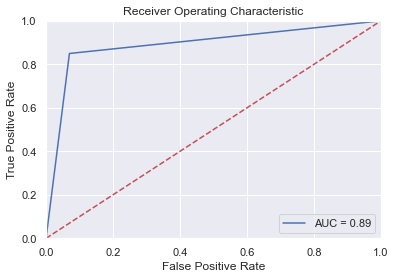

In [53]:
import numpy as np
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = nb.predict_proba(X_test)
preds = probs[:,1]
y_test_1 = y_test.map({1:0, 2:1})
y_pred_1 = np.where(y_pred_NB==1, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred_1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

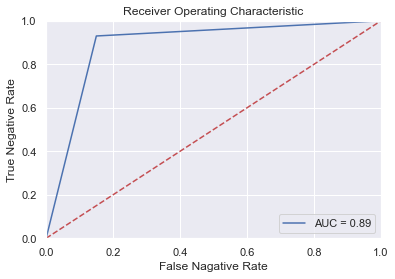

In [54]:
y_test_2 = y_test.map({2:0, 1:1})
y_pred_2 = np.where(y_pred_NB==2, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_2, y_pred_2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Nagative Rate')
plt.show()

<H3>6.7.2 ROC Curve for Random Forest 

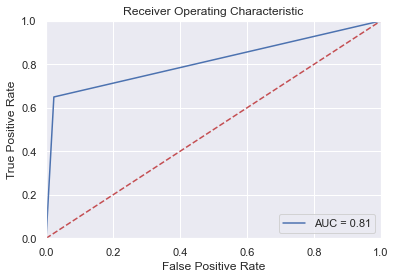

In [55]:
# calculate the fpr and tpr for all thresholds of the classification
probs = Random_Forest.predict_proba(X_test)
preds = probs[:,1]
y_test_1 = y_test.map({1:0, 2:1})
y_pred_1 = np.where(y_pred_RF==1, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred_1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

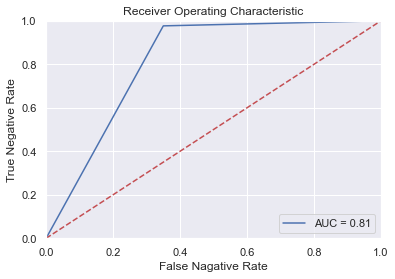

In [56]:
y_test_2 = y_test.map({2:0, 1:1})
y_pred_2 = np.where(y_pred_RF==2, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_2, y_pred_2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Nagative Rate')
plt.show()

<H3>6.7.3 ROC Curve for Extra Trees 

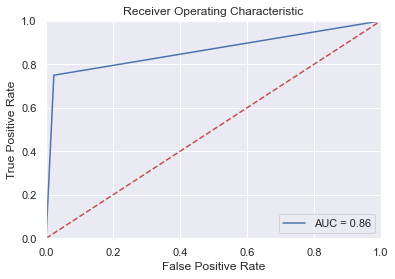

In [57]:
# calculate the fpr and tpr for all thresholds of the classification
probs = Extra_Trees.predict_proba(X_test)
preds = probs[:,1]
y_test_1 = y_test.map({1:0, 2:1})
y_pred_1 = np.where(y_pred_ET==1, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred_1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

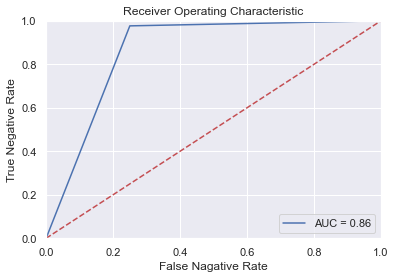

In [58]:
y_test_2 = y_test.map({2:0, 1:1})
y_pred_2 = np.where(y_pred_ET==2, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_2, y_pred_2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Nagative Rate')
plt.show()

In [59]:


# Function to get profits out of the predicted value
# Parameters
# cnf_mat_tuple - Tuple conataining confusion matrix components in this order 1. True Positive 2. False 
def GetProfits(cnf_mat_tuple, variable, classifier =  '',constant = 1000, variableLabel = 'customers', perc = 0.35):
    TP = cnf_mat_tuple[0]
    FP = cnf_mat_tuple[1]
    TN = cnf_mat_tuple[2]
    FN = cnf_mat_tuple[3]
    TP_perc = TP / (TP+FP+FN+TN)
    FP_perc = FP / (TP+FP+FN+TN)
    FN_perc = FN / (TP+FP+FN+TN)
    TN_perc = TN / (TP+FP+FN+TN)
    
    profit = []
    count = 0
    for i in range(len(variable)):
        profit.append([variable[i], 
                     round((variable[i] * TP_perc * (constant * (1 + (perc)))) - (
                         (variable[i] * FP_perc * constant) + (variable[i] * FN_perc * (constant * perc))
                     ),2), classifier])
        count = count + 1
    return pd.DataFrame(profit, columns=[variableLabel, 'profit', 'classifier'])



In [60]:
print("Sanity Test")
print("Less than 50% accuracy")
print(GetProfits((10,15,15,5),[1,5,10,15]).iloc[:,0:2]) # Less than 50% accuracy
print("Exactly 50% accuracy")
print(GetProfits((5,5,5,5),[1,5,10,15]).iloc[:,0:2]) # Exactly 50% accuracy
print("More than 50% accuracy")
print(GetProfits((10,5,5,5),[1,5,10,15]).iloc[:,0:2]) # More than 50% accuraccy. To be specific 60% accuracy

Sanity Test
Less than 50% accuracy
   customers   profit
0          1   -72.22
1          5  -361.11
2         10  -722.22
3         15 -1083.33
Exactly 50% accuracy
   customers  profit
0          1     0.0
1          5     0.0
2         10     0.0
3         15     0.0
More than 50% accuracy
   customers  profit
0          1   270.0
1          5  1350.0
2         10  2700.0
3         15  4050.0


In [61]:
customers= [10, 100, 500, 1000, 5000, 10000, 15000, 25000, 40000, 50000, 60000, 75000, 90000, 100000]

print("Naive Bayes")
df_customer_NB = GetProfits((TP_NB, FP_NB, FN_NB, TN_NB), customers, 'Naive Bayes')
print(df_customer_NB.iloc[:,0:2])

print("Random Forest")
df_customer_RF = GetProfits((TP, FP, FN, TN), customers, 'Random Forest')
print(df_customer_RF.iloc[:,0:2])

print("Extra Trees Classifier")
df_customer_ET = GetProfits((TP_ET, FP_ET, FN_ET, TN_ET), customers, 'Extra Trees Classifier')
print(df_customer_ET.iloc[:,0:2])

Naive Bayes
    customers       profit
0          10      7150.79
1         100     71507.94
2         500    357539.68
3        1000    715079.37
4        5000   3575396.83
5       10000   7150793.65
6       15000  10726190.48
7       25000  17876984.13
8       40000  28603174.60
9       50000  35753968.25
10      60000  42904761.90
11      75000  53630952.38
12      90000  64357142.86
13     100000  71507936.51
Random Forest
    customers       profit
0          10      7166.67
1         100     71666.67
2         500    358333.33
3        1000    716666.67
4        5000   3583333.33
5       10000   7166666.67
6       15000  10750000.00
7       25000  17916666.67
8       40000  28666666.67
9       50000  35833333.33
10      60000  43000000.00
11      75000  53750000.00
12      90000  64500000.00
13     100000  71666666.67
Extra Trees Classifier
    customers       profit
0          10      7373.02
1         100     73730.16
2         500    368650.79
3        1000    737301.59
4     

<AxesSubplot:xlabel='customers', ylabel='profit'>

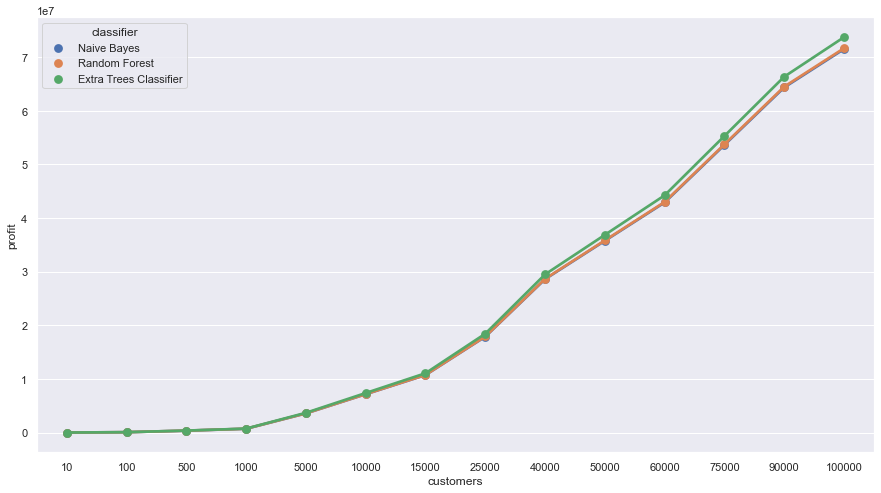

In [62]:
df_classifiers = pd.concat([df_customer_NB, df_customer_RF, df_customer_ET])
plt.figure(figsize=(15,8))
sns.pointplot(x="customers", y="profit", hue = "classifier", data=df_classifiers)

In [63]:
numerical_credit = df.select_dtypes(exclude='O')
numerical_credit

,Forme_juridique,Ancienneté,R1,R2,R3,R4,R5,R6,R7,X1,X2,X3,X4,X5,Z,statut
9,1,0,0.77778,-0.22128,1.51669,0.00288,0.06487,0.21819,0.01769,0.24301,0.01271,0.17135,1.24627,0.46820,2.090823,1
10,1,0,0.76554,-0.55612,1.30405,0.01083,0.05216,0.13413,-0.00152,0.18352,0.01387,0.19601,1.51616,0.53135,2.327521,1
15,0,1,0.67823,0.04699,1.75014,0.10678,0.27625,0.45175,-0.04893,0.34649,0.02071,0.11688,1.21372,0.61769,2.176408,1
16,0,1,0.63594,0.10041,1.79789,0.17689,0.35784,0.49587,-0.05488,0.35257,0.02013,0.05109,1.02108,0.46296,1.695471,2
17,0,1,0.67069,0.16601,1.71128,0.14216,0.50070,0.50842,-0.01968,0.31261,0.02054,0.06555,1.01787,0.40674,1.637665,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1,3,1.00000,-0.04058,2.69119,0.00269,0.84497,0.65755,0.72160,0.14221,0.00000,0.04937,0.29249,1.10167,1.610737,2
1036,1,3,0.90527,-0.18993,2.75878,0.04637,0.45270,0.47298,0.39017,0.16372,0.00921,0.03984,0.30289,1.37575,1.898314,1
1037,1,3,0.86845,-0.04210,4.28316,0.01717,0.74894,0.71804,0.43970,0.24452,0.00615,0.25373,0.38318,1.14098,2.510231,1
1047,1,3,0.66793,-0.17236,1.93145,0.00457,0.21969,0.00000,0.16126,0.32945,0.00000,0.38548,0.83921,0.75106,2.922010,1


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [65]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(X_kbest)

In [66]:
distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

KeyboardInterrupt: 

In [ ]:
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2) 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][r])
    visualizer.fit(scaled_credit)
    ax[q - 1][r].set_title("For Cluster_"+str(i))
    ax[q - 1][r].set_xlabel("Silhouette Score")

In [ ]:
from yellowbrick.cluster import KElbowVisualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='calinski_harabasz',timings=False)
visualizer.fit(scaled_credit)
visualizer.show()

In [ ]:
from gap_statistic.optimalK import OptimalK

In [ ]:
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1, 10))
gap_result = optimalK.gap_df
gap_result.head()

In [ ]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r', linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

In [ ]:
from gap_statistic.optimalK import OptimalK
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1, 10))
gap_result = optimalK.gap_df
gap_result.head()

In [ ]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

In [ ]:
df.head()


In [ ]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

In [ ]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 1],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], s = 80,
            marker= 'x', color = 'k')
plt.title('X1 vs X3')
plt.subplot(312)
plt.scatter(scaled_credit[:, 1], scaled_credit[:, 0],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1],
            kmeans.cluster_centers_[:, 0], s = 80,
            marker= 'x', color = 'k')
plt.title('z vs R6')



In [ ]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

    

In [ ]:
scaled_credit

In [ ]:
X_kbest.head()

In [ ]:
df['clusters'] = pd.DataFrame(kmeans.labels_)
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = df['clusters']
df_scaled['statut'] = df['statut']


In [ ]:
df_scaled.columns = ['X5','Z','Clusters', 'statut']


In [ ]:
df_scaled[df_scaled.Clusters == 1]['statut'].value_counts()

In [ ]:
df_scaled[df_scaled.Clusters == 0]['statut'].value_counts().plot(kind='bar', figsize=(10, 6), title="Frequency of Risk Level");


In [ ]:
df_scaled[df_scaled.Clusters == 1]['statut'].value_counts().plot(kind='bar', figsize=(10, 6), title="Frequency of Risk Level");

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('statut', axis=1)
y = df_scaled.loc[:, ['statut', 'Clusters']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]


In [ ]:
first_cluster_train

In [ ]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')
X_train1 = second_cluster_train
y_train1 = y_train[y_train.Clusters == 0]['statut'] 
 


In [ ]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV 
import time

In [ ]:
param_svc = {'gamma': [1e-6, 1e-2],
                      'C':[0.001,.09,1,5,10],
                      'kernel':('linear','rbf')}

svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, param_svc,scoring = 'roc_auc', n_jobs=-1) 
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))
Besthyperparameters for first cluster in SVC 0.8273860106443562 with
         {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}

y_pred_SVC1 = halve_SVC.predict(X_test1) 
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_SVC1)))
The ROC AUC score of SVC for first cluster is 0.5179

In [ ]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging 
tf.get_logger().setLevel(logging.ERROR) 

def DL_risk(dropout_rate,verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal',
                activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal',
                activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal',
                activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [ ]:
import scikitplot as skplt